# Udacity | Data Scientist Nanodegree |  
# Project 1 - Write A Data Science Blog Post

**Creation date: 07.11.2020  
Created by Michelle Leemans**

## Table of Contents
1. [Business understanding](#Business)
1. [Data Understanding](#Data)
1. [Question I](#q1) | Do programmers have equal salary in Europe and North America and is there a 'gender gap'?  
    3.1 [Prepare Data](#Prepare1)  
    3.2 [Data Modeling](#Modeling1)    
    3.3 [Evaluating the results](#Eval1)    
1. [Question II](#q2) | Do programmers have equal satisfaction score (both career or job) in Europe and North America and is there a 'gender gap'?    
    4.1 [Prepare Data](#Prepare2)  
    4.2 [Data Modeling](#Modeling2)    
    4.3 [Evaluating the results](#Eval2)
1. [Question III](#q3) | What are the most common used languages?   
    5.1 [Prepare Data](#Prepare3)  
    5.2 [Data Modeling](#Modeling3)    
    5.3 [Evaluating the results](#Eval3)  


## 1. Business understanding <a id='Business'>

Within this first project of the Udacity Data Scientist Nanodegree, I investigated the Stack Overflow data from 2017. Within this data analysis 3 specific questions were answered:

1. Do programmers have equal salary in Europe and North America and is there a 'gender gap'?
1. Do programmers have equal satisfaction score (both career or job) in Europe and North America and is there a 'gender gap'?
1. What are the most common used languages?



## 2. Data understanding <a id='Data'>

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [2]:
# read in csv file

df = pd.read_csv('survey_results_public.csv')
df.head(2)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0


In [3]:
# Check columns
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [4]:
# Check statistics
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [6]:
#Investigate numbers per country of interest.
print('The amount of participants in Belgium is {}.'.format(np.sum(df['Country']=='Belgium')))
print('The amount of participants in Italy is {}.'.format(np.sum(df['Country']=='Italy')))
print('The amount of participants in Spain is {}.'.format(np.sum(df['Country']=='Spain')))

The amount of participants in Belgium is 404.
The amount of participants in Italy is 781.
The amount of participants in Spain is 864.


In [7]:
# See gender distribution
df['Gender'].value_counts()[:2]

Male      31589
Female     2600
Name: Gender, dtype: int64

In [8]:
# Calculate percentage women vs men in Stackoverflow data
print('The percentage of women in the Stackoverflow data of 2017 is {} %.'.format(np.sum((df['Gender']=='Female') / df.shape[0])*100))
print('The percentage of men in the Stackoverflow data of 2017 is {} %.'.format(np.sum((df['Gender']=='Male') / df.shape[0])*100))

The percentage of women in the Stackoverflow data of 2017 is 5.059153175591531 %.
The percentage of men in the Stackoverflow data of 2017 is 61.46676525529266 %.


In [9]:
def bar_chart_display (df, column, title):
    '''
    Displays a bar chart of the column of interest with a title
    
    Parameters:
    df: the dataframe of interest
    column: the column of interest
    title: an according title to the bar chart
    
    Returns: a bar chart
    '''
    intervals = df[column].value_counts()
    (intervals[:10]/df.shape[0]).plot(kind = 'bar', color = 'pink', edgecolor="black");
    plt.title(title);
    

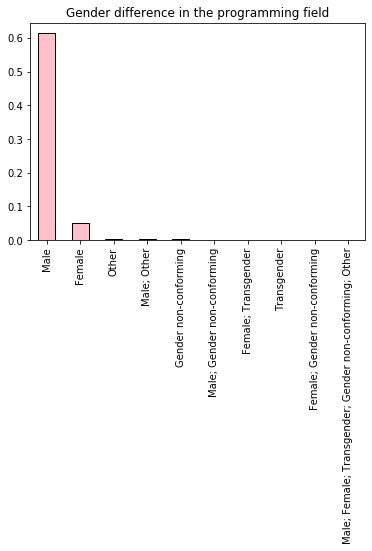

In [10]:
bar_chart_display(df = df,column ='Gender', title = 'Gender difference in the programming field')

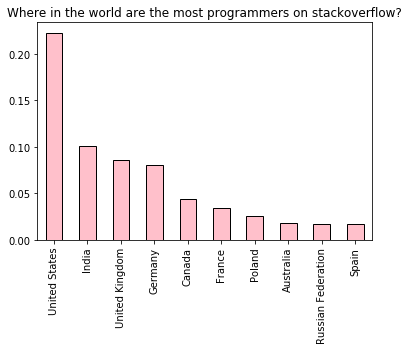

In [11]:
bar_chart_display(df, 'Country', 'Where in the world are the most programmers on stackoverflow?')

## 3. Question I |Do programmers have equal salary in Europe and North America and is there a 'gender gap'? <a id='q1'>

### 3.1 Prepare Data  <a id='Prepare1'>

In [12]:
# Split continent Europe and North-America

def define_continent(df):
    Europe = ['Liechtenstein', 'Switzerland', 
           'Iceland', 'Norway', 'Denmark', 
           'Ireland', 'Canada', 'United Kingdom', 'Germany', 
           'Netherlands', 'Sweden', 'Luxembourg', 'Austria', 
           'Finland', 'France', 'Belgium', 'Spain', 'Italy',
           'Poland']
    North_America = ['United States', 'Canada']
    
    df['Continent'] = df['Country'].apply(lambda x: 'Europe' if x in Europe else('North_America' if x in North_America else 'Other'))
    
    return df

In [13]:
# Create function to keep only the columns of interest

def keep_only_useful_columns(df):
    
    columns = ['Country', 'YearsCodedJob', 'EmploymentStatus', 'CareerSatisfaction', 'JobSatisfaction', 
                      'JobSeekingStatus', 'HoursPerWeek', 'Salary', 'Continent', 'Gender', 'HaveWorkedLanguage',
              'WantWorkLanguage']
    useful_df = pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Female' or Gender == 'Male')"))[columns]
    
                                      
    return useful_df
    

In [14]:
#Get only the necessary columns for the analysis

df = define_continent(df)
useful_df = keep_only_useful_columns(df)

In [15]:
# Verification of function 'keep_only_useful_columns' 

useful_df.head(2)

,Country,YearsCodedJob,EmploymentStatus,CareerSatisfaction,JobSatisfaction,JobSeekingStatus,HoursPerWeek,Salary,Continent,Gender,HaveWorkedLanguage,WantWorkLanguage
2,United Kingdom,20 or more years,Employed full-time,8.0,9.0,NaN,NaN,113750.0,Europe,Male,Java; PHP; Python,C; Python; Rust
7,Poland,7 to 8 years,Employed full-time,7.0,7.0,"I'm not actively looking, but I am open to new...",1.0,NaN,Europe,Male,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,Clojure; Elixir; Haskell; Scala


In [16]:
# Change object Dtype of both 'continent' and 'gender' from object to category

useful_df['Continent'] = useful_df['Continent'].astype('category')
useful_df['Gender'] = useful_df['Gender'].astype('category')

In [17]:
# Verification of Dtypes

useful_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25598 entries, 2 to 51390
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Country             25598 non-null  object  
 1   YearsCodedJob       25472 non-null  object  
 2   EmploymentStatus    25598 non-null  object  
 3   CareerSatisfaction  25504 non-null  float64 
 4   JobSatisfaction     24976 non-null  float64 
 5   JobSeekingStatus    18976 non-null  object  
 6   HoursPerWeek        11714 non-null  float64 
 7   Salary              11485 non-null  float64 
 8   Continent           25598 non-null  category
 9   Gender              25598 non-null  category
 10  HaveWorkedLanguage  25334 non-null  object  
 11  WantWorkLanguage    23391 non-null  object  
dtypes: category(2), float64(4), object(6)
memory usage: 2.2+ MB


In [18]:
# Verification of function 'assembling_countries' 
print(useful_df['Continent'].value_counts())

Europe           10484
Other             8741
North_America     6373
Name: Continent, dtype: int64


### 3.2 Data Modeling <a id='Modeling1'>

In [19]:
# Calculate mean Salary by Gender
useful_df.groupby(['Gender']).mean()

,CareerSatisfaction,JobSatisfaction,HoursPerWeek,Salary
Gender,,,,
Female,7.259401,6.938582,3.458704,58083.924534
Male,7.498627,7.051714,3.130685,56996.494293


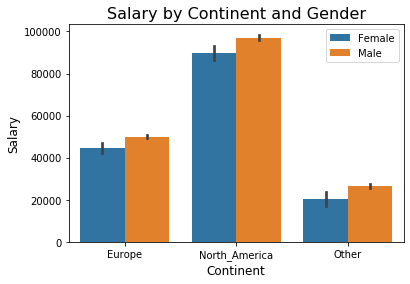

In [20]:
# plot salary by continent and gender
sb.barplot(data = useful_df,
            x = 'Continent', 
            y = 'Salary',
            hue = 'Gender')

plt.title('Salary by Continent and Gender', size = 16);
plt.xlabel("Continent", fontsize = 12);
plt.ylabel("Salary", fontsize = 12);
plt.legend(title_fontsize='40');
plt.savefig('graph1.png', dpi=300, bbox_inches='tight');
plt.show();


### 3.3 Evaluating the results  <a id='#Eval1'>

When plotting the salaries of both male and female programmers in different continents we make two observations:
1. Programmers working in North America (United States + Canada) earn almost double of programmers who work in the Europe and 4 times double than people working on the other continents (including India).  
  
1. Whatever which continent, men on average gain more money as a programmer compared to women.



## 4. Question II | Do programmers have equal satisfaction score (career or job) in Europe and North America and is there a 'gender gap'? <a id='q2'>

### 4.1 Prepare Data  <a id='Prepare2'>

See Question I

### 4.2 Data Modeling <a id='Modeling2'>

In [21]:
# Calculate job satisfaction by gender
useful_df.groupby(['Gender'])['JobSatisfaction'].mean()

Gender
Female    6.938582
Male      7.051714
Name: JobSatisfaction, dtype: float64

In [22]:
# Calculate career satisfaction by gender
useful_df.groupby(['Gender'])['CareerSatisfaction'].mean()

Gender
Female    7.259401
Male      7.498627
Name: CareerSatisfaction, dtype: float64

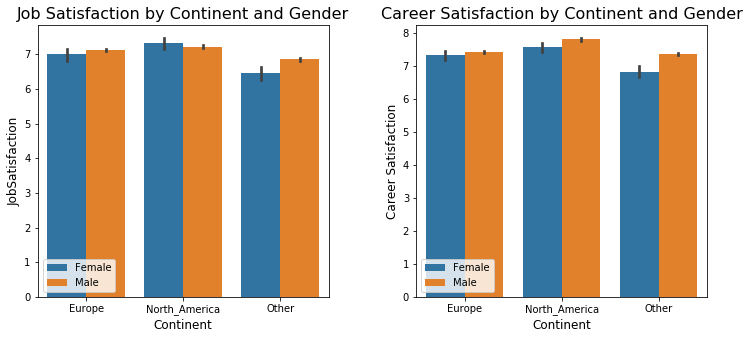

In [23]:
# Plot Job/Career Satisfaction by Continent and Gender 
plt.figure(figsize =[12,5])
plt.subplots_adjust(wspace = 0.3) 

plt.subplot(1,2,1)
sb.barplot(data = useful_df,
            x = 'Continent', 
            y = 'JobSatisfaction',
            hue = 'Gender');
plt.title('Job Satisfaction by Continent and Gender', size = 16);
plt.xlabel("Continent", fontsize = 12);
plt.ylabel('JobSatisfaction', fontsize = 12);
plt.legend(title_fontsize='40');


plt.subplot(1,2,2)
sb.barplot(data = useful_df,
            x = 'Continent', 
            y = 'CareerSatisfaction',
            hue = 'Gender');

plt.title('Career Satisfaction by Continent and Gender', size = 16);
plt.xlabel("Continent", fontsize = 12);
plt.ylabel('Career Satisfaction', fontsize = 12);
plt.legend(title_fontsize='40');
plt.savefig('graph2.png', dpi=300, bbox_inches='tight');

### 4.3 Evaluating the results  <a id='#Eval2'>

When plotting the satisfaction rates of both male and female programmers in different continents we make two observations:
1. Both job satisfaction and and career satisfaction are on average lower in women compared to men this can be explained mainly by a lower satisfaction of women in other continents rather than Europe or North America. 
  
1. Both job and career satisfaction scores are the highest in North America, closely followed by Europe. The lowest satisfactions scores are found in other continents. 

## 5. Question III | What are the most common used languages?  <a id='q3'>

### 5.1 Prepare Data  <a id='Prepare3'>

In [24]:
# Check HaveWorkedLanguage column

useful_df['HaveWorkedLanguage'].value_counts()

C#; JavaScript; SQL                              1143
JavaScript; PHP; SQL                              908
Java                                              615
JavaScript                                        570
Java; JavaScript; SQL                             562
                                                 ... 
C; C++; JavaScript; Lua; Python; SQL                1
C++; C#; Java; Python; SQL                          1
Java; JavaScript; Python; R; Scala; Smalltalk       1
Matlab; Objective-C; Ruby; Swift                    1
Assembly; C#; Java; Perl; SQL                       1
Name: HaveWorkedLanguage, Length: 6076, dtype: int64

In [25]:
#Split various langues 

languages =useful_df['HaveWorkedLanguage'].str.split('; ', expand=True).stack().value_counts()
languages

JavaScript        17061
SQL               13796
Java               9795
C#                 9405
Python             7018
PHP                6916
C++                4863
C                  3877
TypeScript         2905
Ruby               2405
Objective-C        1853
Swift              1738
VB.NET             1550
Go                 1163
Perl               1054
Scala              1025
Groovy              968
CoffeeScript        945
Assembly            915
VBA                 889
R                   752
Matlab              724
Visual Basic 6      617
Lua                 565
F#                  343
Haskell             332
Elixir              282
Clojure             278
Rust                250
Smalltalk           223
Erlang              182
Common Lisp         132
Dart                 98
Julia                62
Hack                 58
dtype: int64

### 5.2 Data Modeling <a id='Modeling3'>

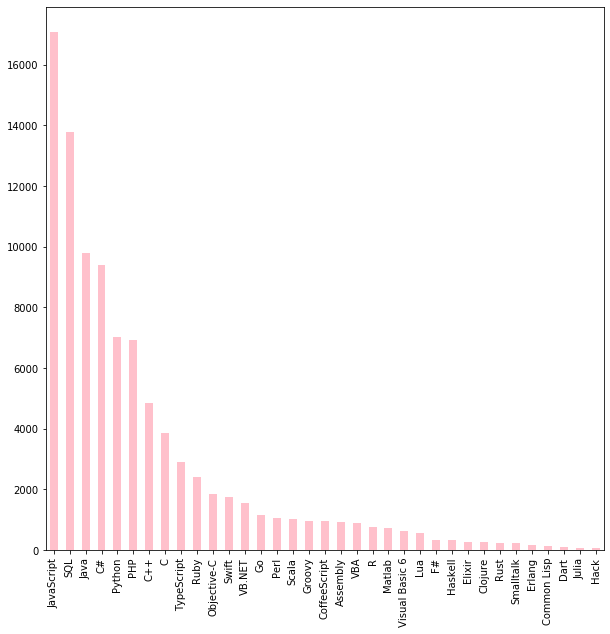

In [26]:
# Plot languages used

plt.figure(figsize=(10,10))
languages.plot(kind="bar", color = 'pink')
plt.savefig('graph3.png', dpi=300, bbox_inches='tight')

### 5.3 Evaluating the results  <a id='#Eval3'>

The most used language worldwide is JavaScript, followed by SQL, and Java. Python is the 5th most used languaged following the Stackoverflow data of 2017.